
# <span style="color:rgb(213,80,0)">パラメータ化拡張GFT</span>

2024年12月31日


村松正吾，内藤翼（新潟大学）

 Under the directory *"code/appendix"*  in this package, please do not forget to run 
 
 **"> pip install ."** 
    
 and then return to this directory.

##
## 参考文献:
-  H. Kitamura, H. Yasuda, Y. Tanaka and S. Muramatsu, "Realization of DiGraph Filters Via Augmented GFT," 2023 IEEE International Conference on Image Processing (ICIP), Kuala Lumpur, Malaysia, 2023, pp. 2885\-2889, doi: 10.1109/ICIP49359.2023.10222618.
-  Abstract: This study proposes a filtering method for directed graph (digraph) signals. In order to realize digraph filtering, a novel graph Fourier transform (GFT), – Augmented GFT (AuGFT) –, is proposed by defining an Hermitian adjacency matrix. Although there has been the same method to give the adjacency matrix of digraphs, this study defines a novel digraph Laplacian. The existing digraph Laplacian does not give the graph signal variation considering the edge directions, while the novel one does. This paper introduces three important ideas. The first is the definition of a novel degree matrix to give the novel digraph Laplacian. The second is to decompose the symmetric and skew\-symmetric components of the novel digraph Laplacian independently into their spectral components. The third is, based on the decomposition, to augment the conventional GFT for digraphs as an invertible real\-valued dictionary. The new GFT is shown to provide a practical form of real\-valued digraph filtering. The significance of the proposed method is verified through simulations of signal filtering on digraphs.
-  URL: [https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=10222618&isnumber=10221892](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=10222618&isnumber=10221892)

**謝辞：**

-  本研究は[科研費21H04596](https://kaken.nii.ac.jp/ja/grant/KAKENHI-PROJECT-21H04596/)および[科研費22H00512](https://kaken.nii.ac.jp/ja/grant/KAKENHI-PROJECT-22H09512/)助成による。

## 各種設定

In [1]:
# Install the missing packages
%pip install numpy networkx matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
isDiGraph = True # 有向グラフとして解析する場合はTrue, 無向グラフとして解析する場合はFalse  

In [3]:
RESULTS_DIR = "../results/"
FIGEXT = ".png"


## 有向グラフの隣接行列 $A$ の生成

有向グラフ $\mathcal{G}$ の定義


In [4]:


import numpy as np
import networkx as nx

s = np.array([1, 1, 2, 2, 3, 3, 4, 4, 4, 5])
t = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 4])
G = nx.DiGraph()
G.add_edges_from(zip(s, t))


有向非巡回性の確認


In [5]:
nx.is_directed_acyclic_graph(G)

True


有向グラフ $\mathcal{G}$ のエッジ $\mathcal{E}$


In [6]:
G.edges

OutEdgeView([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7), (4, 8), (4, 9), (4, 10), (5, 4)])


有向グラフ $\mathcal{G}$ のノード $\mathcal{V}$


In [7]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10))


## 有向グラフ $\mathcal{G}$ の描画

In [8]:
A = nx.to_numpy_array(G, weight='weight')
print(A)

[[0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


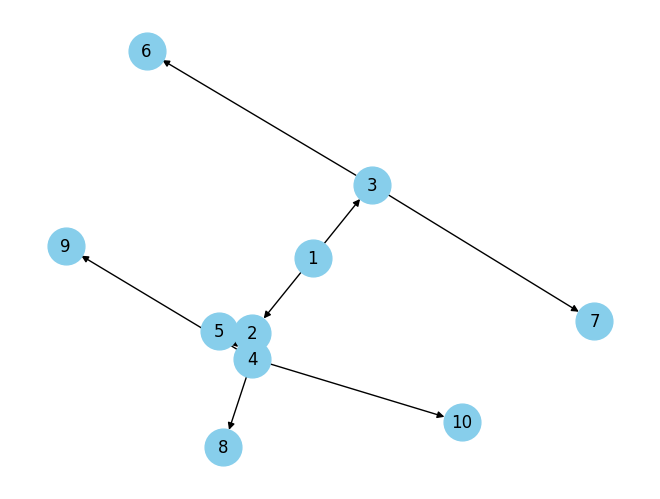

In [9]:
from matplotlib.pyplot import figure
import networkx as nx

figure()
np.random.seed(42)
h = nx.draw(G, with_labels=True, node_size=700, node_color="skyblue", pos=nx.spring_layout(G))


In [10]:
from py_augft import fcn_digraphops

if not isDiGraph:
    if isinstance(A, nx.DiGraph) or isinstance(A, nx.Graph):
        A = nx.adjacency_matrix(A).todense()
    A = (A + A.T) / 2
[U, Q, C, D, L, Lmd, Sgm] = fcn_digraphops(A)

np.set_printoptions(precision=4,suppress=True)
print('U = \n',U)
print('Q = \n',Q)
print('C = \n',C)
print('D = \n',D)
print('L = \n',L)
print('Lmd = \n',Lmd)
print('Sgm = \n',Sgm)

U = 
 [[ 0.2531 -0.0136  0.      0.      0.     -0.534   0.6691 -0.0443  0.4458
  -0.0475]
 [ 0.1507  0.1399  0.      0.     -0.     -0.4741 -0.0484  0.6651 -0.4861
   0.2281]
 [ 0.3839 -0.1673  0.     -0.      0.     -0.071   0.201  -0.5793 -0.6659
   0.0141]
 [ 0.1405  0.2829  0.      0.     -0.     -0.0788 -0.0996  0.0864 -0.1066
  -0.9302]
 [ 0.1379  0.2101  0.      0.     -0.     -0.5416 -0.6489 -0.3884  0.2294
   0.1378]
 [ 0.5502 -0.2798  0.7001 -0.0103 -0.0986  0.1805 -0.1695  0.173   0.1665
  -0.0022]
 [ 0.5502 -0.2798 -0.7001  0.0103  0.0986  0.1805 -0.1695  0.173   0.1665
  -0.0022]
 [ 0.2014  0.4731 -0.1143 -0.1232 -0.799   0.2003  0.084  -0.0258  0.0267
   0.1429]
 [ 0.2014  0.4731  0.0619 -0.6373  0.5066  0.2003  0.084  -0.0258  0.0267
   0.1429]
 [ 0.2014  0.4731  0.0524  0.7605  0.2924  0.2003  0.084  -0.0258  0.0267
   0.1429]]
Q = 
 [[ 0.3513  0.      0.593   0.      0.4148  0.    ]
 [-0.     -0.6379  0.     -0.1478  0.     -0.7558]
 [ 0.     -0.2176 -0.     -0.9068 -

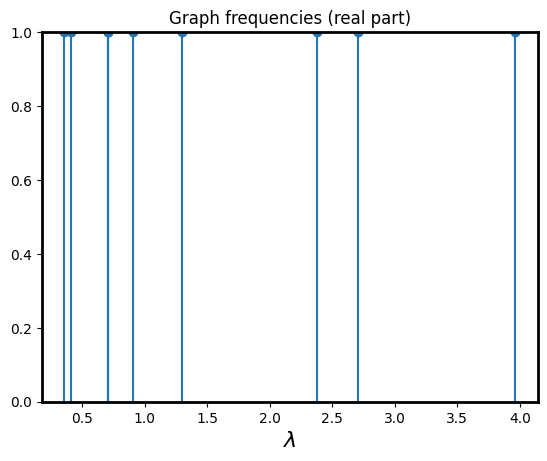

In [11]:
import matplotlib.pyplot as plt
x = np.diag(Lmd)
y = np.ones(x.shape)
plt.stem(x, y, markerfmt='o', basefmt=" ")
plt.title('Graph frequencies (real part)')
plt.xlabel(r'$\lambda$', fontsize=16)
plt.ylim(0, 1)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.show()
#plt.savefig(RESULTS_DIR + "EigenValues_sym" + FIGEXT)

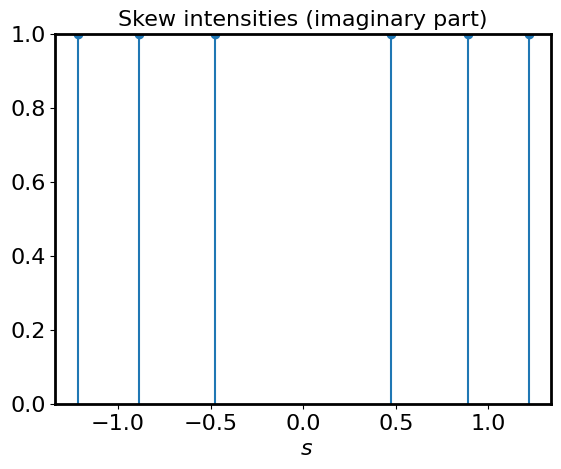

In [12]:
sgm = np.sort(np.concatenate([np.diag(Sgm, 1), np.diag(Sgm, -1)]))
idxg = np.nonzero(sgm)[0]
gma = sgm[idxg]
if len(gma) > 0:
    y = np.ones(len(gma))
    plt.stem(gma, y, markerfmt='o', basefmt=" ")
    plt.title('Skew intensities (imaginary part)', fontsize=16)
    plt.xlabel(' $s$ ', fontsize=16)
    plt.ylim(0, 1)
    ax = plt.gca()
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.tick_params(axis='both', which='major', labelsize=16)
    plt.show()    
    #plt.savefig(RESULTS_DIR + "EigenValues_skw" + FIGEXT)




## $\;{\mathbf{u}}_{\lambda_k }$ 拡張GFT（対称成分）の基底ベクトル

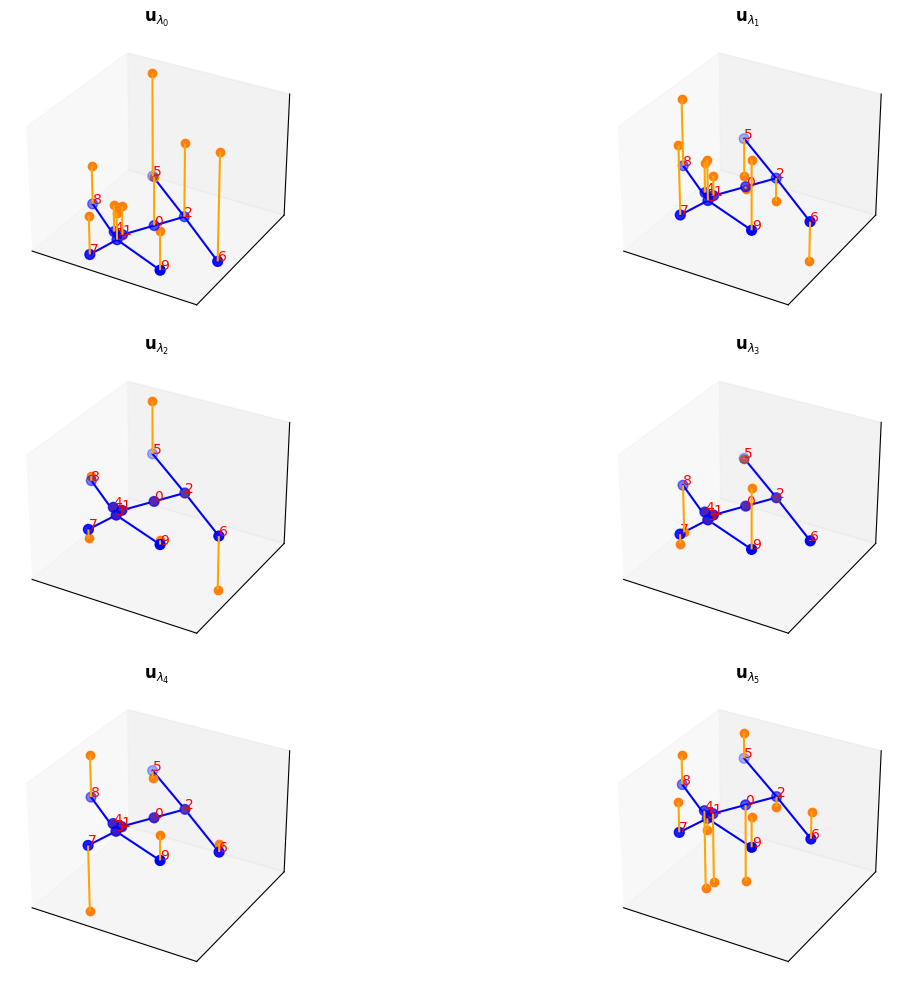

In [13]:
zscale = .8
fontSize = 12  # 36
lineWidth = 1  # 3
arrowSize = 4  # 12
az = 200
el = 20

fig, axs = plt.subplots(3, 2, subplot_kw={'projection': '3d'}, figsize=(15, 10))

for k in range(6):
    i = k // 2
    j = k % 2
    #
    uk = U[:, k]
    #
    np.random.seed(42)
    ax = axs[i, j]
    pos = nx.spring_layout(G)
    xs, ys = zip(*[pos[n] for n in G.nodes()])
    zs = np.zeros_like(xs)

    ax.scatter(xs, ys, zs, s=50, color='blue')
    for l, (x, y, z) in enumerate(zip(xs, ys, zs)):
        ax.text(x, y, z, str(l), color='red')

    for edge in G.edges():
        x = [pos[edge[0]][0], pos[edge[1]][0]]
        y = [pos[edge[0]][1], pos[edge[1]][1]]
        z = [0, 0]
        ax.plot(x, y, z, color='blue')

    ax.stem(xs, ys, uk, linefmt='orange', markerfmt='o', basefmt=' ')
    ax.set_title(r'$\mathbf{u}_{\lambda_{' + str(k) + r'}}$', fontsize=fontSize)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    #ax.view_init(az, el)

plt.tight_layout()
plt.show()


## $\;{\mathit{\mathbf{q}}}_{s_k }$ 拡張GFT（交代成分）の基底ベクトル

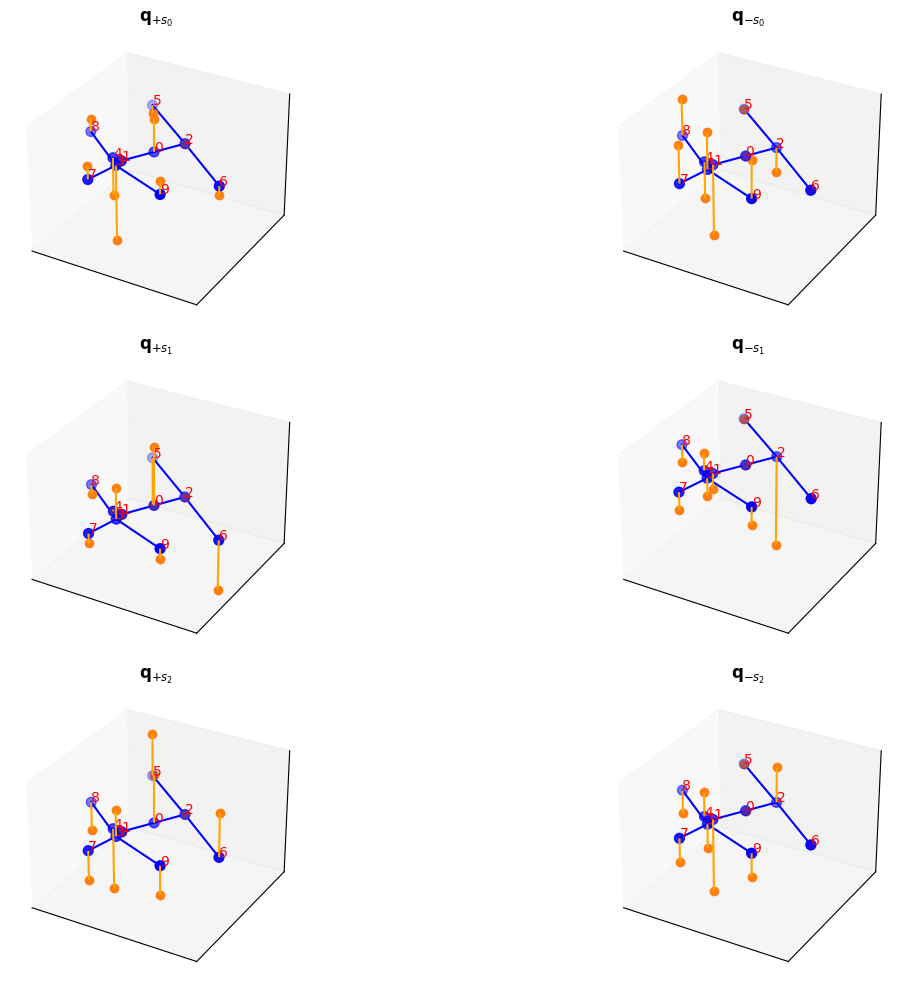

In [14]:
fig, axs = plt.subplots(3, 2, subplot_kw={'projection': '3d'}, figsize=(15, 10))

for k in range(6):
    i = k // 2
    j = k % 2
    #
    qk = Q[:, k]
    #
    np.random.seed(42)
    ax = axs[i, j]
    pos = nx.spring_layout(G)
    xs, ys = zip(*[pos[n] for n in G.nodes()])
    zs = np.zeros_like(xs)

    ax.scatter(xs, ys, zs, s=50, color='blue')
    for l, (x, y, z) in enumerate(zip(xs, ys, zs)):
        ax.text(x, y, z, str(l), color='red')

    for edge in G.edges():
        x = [pos[edge[0]][0], pos[edge[1]][0]]
        y = [pos[edge[0]][1], pos[edge[1]][1]]
        z = [0, 0]
        ax.plot(x, y, z, color='blue')

    ax.stem(xs, ys, qk, linefmt='orange', markerfmt='o', basefmt=' ')
    if k % 2 == 0:
        ax.set_title(r'$\mathbf{q}_{+s_{' + str(k//2) + r'}}$', fontsize=fontSize)
    else:
        ax.set_title(r'$\mathbf{q}_{-s_{' + str(k//2) + r'}}$', fontsize=fontSize)

    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    #ax.view_init(az, el)

plt.tight_layout()
plt.show()    


##
$$\;$$

## 変動の確認

$$L=\left(\begin{array}{cccc} d_{11}  & -b_{12}  & -b_{13}  & -b_{14} \newline -{\bar{b} }_{12}  & d_{22}  & -b_{23}  & -b_{24} \newline -{\bar{b} }_{13}  & -{\bar{b} }_{23}  & d_{33}  & -b_{34} \newline -{\bar{b} }_{14}  & -{\bar{b} }_{24}  & -{\bar{b} }_{34}  & d_{44}  \end{array}\right)$$


$$\underset{y}{\underbrace{\left(\begin{array}{c} y_1 \newline y_2 \newline y_3 \newline y_4  \end{array}\right)} } =\underset{L}{\underbrace{\left(\begin{array}{cccc} d_{11}  & -b_{12}  & -b_{13}  & -b_{14} \newline -{\bar{b} }_{12}  & d_{22}  & -b_{23}  & -b_{24} \newline -{\bar{b} }_{13}  & -{\bar{b} }_{23}  & d_{33}  & -b_{34} \newline -{\bar{b} }_{14}  & -{\bar{b} }_{24}  & -{\bar{b} }_{34}  & d_{44}  \end{array}\right)} } \underset{x}{\underbrace{\left(\begin{array}{c} x_1 \newline x_2 \newline x_3 \newline x_4  \end{array}\right)} }$$

$$d_{k,k} :=\sum_{\ell \in \mathcal{N}\backslash \lbrace k\rbrace } |c_{k,\ell } |=\sum_{\ell \in \mathcal{N}\backslash \lbrace k\rbrace } |c_{\ell ,k} |=\sum_{\ell \in \mathcal{N}\backslash \lbrace k\rbrace } \sqrt{c_{k,\ell } b_{\ell ,k} }=\sum_{\ell \in \mathcal{N}\backslash \lbrace k\rbrace } \sqrt{c_{k,\ell } {\bar{c} }_{k,\ell } }$$

ただし， $\mathcal{N}:=\lbrace 1,2,\cdots ,N\rbrace$ 。


$$y_k =d_{k,k} x_k -\sum_{\ell =k+1}^N b_{k,\ell } x_{\ell } -\sum_{\ell =1}^{k-1} {\bar{b} }_{k,\ell } x_{\ell }$$


$$\Delta_L (x)=x^T Lx=\sum_{k\in \mathcal{N}} \sum_{\ell =k+1}^N |b_{k,\ell } |\cdot |x_k -e^{-j\angle b_{k,\ell } } x_{\ell } |^2$$


行列計算


In [15]:
nDims = L.shape[0]
x = np.random.randn(nDims, 1)
xLx = np.dot(x.T, np.dot(L, x))
print(xLx)

[[13.8758+0.j]]



累積加算


In [16]:
tv = 0
for iRow in range(nDims):
    xk = x[iRow, 0]
    for iCol in range(iRow + 1, nDims):
        ckl = C[iRow, iCol]
        xl = x[iCol, 0]
        tv += abs(ckl) * abs(xk - np.exp(1j * np.angle(ckl)) * xl) ** 2
tv


13.875776047175838


誤差評価


In [17]:
assert(abs(xLx - tv)<1e-6,'Invalid TV')


<>:1: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:1: SyntaxWarning: assertion is always true, perhaps remove parentheses?
C:\Users\shogo\AppData\Local\Temp\ipykernel_26500\1753463070.py:1: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(abs(xLx - tv)<1e-6,'Invalid TV')


In [18]:
waterlevel = np.random.randn(nDims,nDims)
print(waterlevel)

[[-1.151   0.3757 -0.6006 -0.2917 -0.6017  1.8523 -0.0135 -1.0577  0.8225
  -1.2208]
 [ 0.2089 -1.9597 -1.3282  0.1969  0.7385  0.1714 -0.1156 -0.3011 -1.4785
  -0.7198]
 [-0.4606  1.0571  0.3436 -1.763   0.3241 -0.3851 -0.6769  0.6117  1.031
   0.9313]
 [-0.8392 -0.3092  0.3313  0.9755 -0.4792 -0.1857 -1.1063 -1.1962  0.8125
   1.3562]
 [-0.072   1.0035  0.3616 -0.6451  0.3614  1.538  -0.0358  1.5646 -2.6197
   0.8219]
 [ 0.087  -0.299   0.0918 -1.9876 -0.2197  0.3571  1.4779 -0.5183 -0.8085
  -0.5018]
 [ 0.9154  0.3288 -0.5298  0.5133  0.0971  0.9686 -0.7021 -0.3277 -0.3921
  -1.4635]
 [ 0.2961  0.2611  0.0051 -0.2346 -1.4154 -0.4206 -0.3427 -0.8023 -0.1613
   0.4041]
 [ 1.8862  0.1746  0.2576 -0.0744 -1.9188 -0.0265  0.0602  2.4632 -0.1924
   0.3015]
 [-0.0347 -1.1687  1.1428  0.7519  0.791  -0.9094  1.4028 -1.4019  0.5869
   2.1905]]



## AuGFTによるフィルタ処理

パラメータ $\alpha$ を導入し一般化したAuGFT

<p style="text-align:left">
   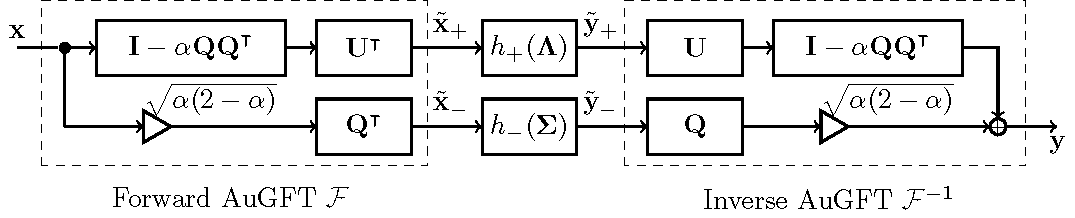
</p>


-  $\displaystyle 0\le \alpha \le 1$
-  $\displaystyle \beta =\sqrt{\alpha (2-\alpha )}$

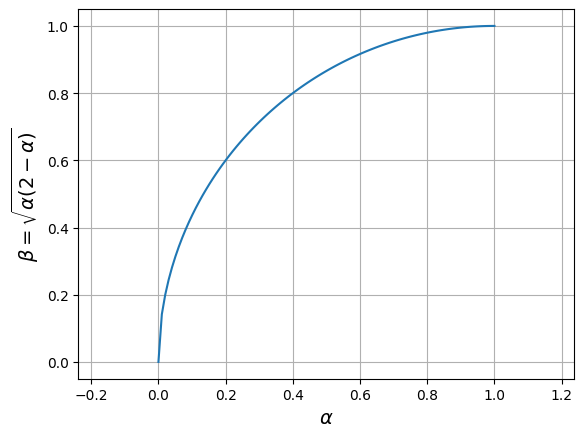

In [19]:
plt.figure()
x = np.linspace(0, 1, 100)
y = np.sqrt(x * (2 - x))
plt.plot(x, y)
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'$\beta=\sqrt{\alpha(2-\alpha)}$', fontsize=14)
plt.axis('equal')
plt.grid(True)
ax = plt.gca()
plt.show()

In [20]:
from py_augft import fcn_fwdAuGFT, fcn_invAuGFT

x = np.array(waterlevel)
freqXSet, _ = fcn_fwdAuGFT(x, U, Q)

In [21]:

y, _  = fcn_invAuGFT(freqXSet,U,Q)

In [22]:
rmse = lambda rx, ry: np.linalg.norm(rx.flatten() - ry.flatten(), 2) / np.sqrt(rx.size)



In [23]:
# Extract the relevant array from the tuple
# Assuming the first element of the tuple is the array you need
assert(np.linalg.norm(x - y,'fro') < 1e-6)

